In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import missingno as msno
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Датасет "Задержки вылетов авиакомпаний за 2019 год"

In [13]:
file_path = 'FlightDelay/full_data_flightdelay.csv'
data = pd.read_csv(file_path, low_memory=False)
data.head(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [14]:
print("Общая информация о данных:")
data.info()

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT  

Набор данных был загружен с сайта Kaggle. Выбран датасет под названием “2019 Airline Delays w/Weather and Airport Detail” (Задержки вылетов авиакомпаний за 2019 год с уточнением погодных условий и аэропортов). Датасет используется для задач классификаций. 


Задержки рейсов являются серьезной проблемой как для путешественников, так и для авиакомпаний, что влечет за собой значительные финансовые и репутационные последствия. Прогнозирование задержек рейсов имеет решающее значение для повышения удовлетворенности клиентов и доходов авиакомпаний. Данный набор данных рассчитан на создание системы машинного обучения, которая могла бы прогнозировать задержки вылетов на основе совокупности факторов. Набор данных включает в себя множество типов данных, таких как время, информация об авиакомпаниях, аэропортах, самолетах и, самое главное, данные о погоде.


Информация была собрана из официальной статистики министерства транспорта США, поэтому записи в наборе содержат информацию только о вылетах из аэропортов США. Используются единицы измерения так же по системе США, т.е. дюймы вместо метров и градусы в Фаренгейтах. Набор содержит 6 489 062 записи. В набор данных включены следующие колонки:


    1. DEP_DEL 15 - целевая переменная. Двоичный класс, который указывает, был ли вылет задержан на 15 минут или более (1 = True / 0 = False).
    2. MONTH - номер месяца, в который произошел перелет. 
    3. DAY_OF_WEEK - номер дня недели, в который произошел полет.
    4. DEP_TIME_BLK - временной интервал для вылетающего воздушного судна в формате: ччмм-ччмм, например: 0800-0859.
    5. DISTANCE_GROUP - группа расстояний, которые должны быть преодолены вылетающим воздушным судном.
    6. SEGMENT_NUMBER - количество рейсов, выполненных воздушным судном за сегодняшний день до текущего рейса.
    7. CONCURRENT_FLIGHTS - количество рейсов, вылетающих из аэропорта в один и тот же период времени.
    8. NUMBER_OF_SEATS - количество мест в самолете.
    9. CARRIER_NAME - название авиакомпании-перевозчика.
    10. AIRPORT_FLIGHTS_MONTH - среднее количество рейсов из аэропорта в месяц.
    11. AIRLINE_FLIGHTS_MONTH - среднее количество рейсов авиакомпании в месяц.
    12. AIRLINE_AIRPORT_FLIGHTS_MONTH - среднее количество рейсов авиакомпании и аэропорта в месяц.
    13. AVG_MONTHLY_PASS_AIRPORT - среднее количество пассажиров в аэропорту вылета за месяц.
    14. AVG_MONTHLY_PASS_AIRLINE - среднее количество пассажиров авиакомпании за месяц.
    15. FLT_ATTENDANTS_PER_PASS - количество бортпроводников на одного пассажира авиакомпании.
    16. GROUND_SERV_PER_PASS - Количество сотрудников наземной службы (service desk) на пассажира авиакомпании.
    17. PLANE_AGE - возраст самолета.
    18. DEPARTING_AIRPORT - название аэропорта вылета.
    19. LATITUDE - широта аэропорта.
    20. LONGITUDE - долгота аэропорта.
    21. PREVIOUS_AIRPORT - название предыдущего аэропорта из которого прилетел самолет.
    22. PRCP - количество осадков в дюймах за день.
    23. SNOW - количество выпавшего снега в дюймах за день.
    24. SNWD - толщина снежного покрова в дюймах за день.
    25. TMAX - максимальная температура в течение дня.
    26. AWND - максимальная скорость ветра в течение дня, в м/с.

In [15]:
duplicates = data.duplicated().sum()
print(f"Количество дубликатов в данных: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()

Количество дубликатов в данных: 28473


In [16]:
print("Количество пропусков в данных:")
data.isna().sum()

Количество пропусков в данных:


MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64

## Кодирование категориальных признаков

In [17]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"Категориальные колонки: {list(categorical_columns)}")

# Преобразование категориальных переменных в числовой формат через label encoding
if len(categorical_columns) > 0:
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
print(label_encoders['DEP_TIME_BLK'].classes_)

Категориальные колонки: ['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']
['0001-0559' '0600-0659' '0700-0759' '0800-0859' '0900-0959' '1000-1059'
 '1100-1159' '1200-1259' '1300-1359' '1400-1459' '1500-1559' '1600-1659'
 '1700-1759' '1800-1859' '1900-1959' '2000-2059' '2100-2159' '2200-2259'
 '2300-2359']


In [18]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 6460589 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   int64  
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   int64  
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              int64  
 18  LATITUD

## Нормализация числовых признаков

In [27]:
# Выбираем числовые колонки
num_columns = ['NUMBER_OF_SEATS', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE'] 

scaler = MinMaxScaler()
data[num_columns] = scaler.fit_transform(data[num_columns])

print(data[num_columns].head())

   NUMBER_OF_SEATS  AVG_MONTHLY_PASS_AIRPORT  AVG_MONTHLY_PASS_AIRLINE
0         0.337884                  0.426728                  1.000000
1         0.501706                  0.426728                  0.928515
2         0.529010                  0.426728                  0.928515
3         0.464164                  0.426728                  0.928515
4         0.470990                  0.426728                  0.171586


In [28]:
data.head(5)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,3,2,1,25,0.337884,14,13056,...,8,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
1,1,7,0,2,7,1,29,0.501706,6,13056,...,3,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
2,1,7,0,1,7,1,27,0.529010,6,13056,...,18,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
3,1,7,0,1,9,1,27,0.464164,6,13056,...,2,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0,7,1,10,0.470990,15,13056,...,1,44,36.08,-115.152,216,0.0,0.0,0.0,65.0,2.91


# Датасет "Статистика по авиакатастрофам с 1908 по 2009 гг."

В качестве данных для анализа был выбран набор «Статистика по авиакатастрофам с 1908 по 2009 гг.», содержащий информацию об авиакатастрофах и авиаинцидентах: жертвы, обстоятельства и самолёты.

В наборе содержатся следующие поля:
1. Date – дата происшествия,
2. Time – время происшествия,
3. Location – примерное место происшествия,
4. Operator – оператор или авиакомпания,
5. Flight# - номер полета,
6. Route – маршрут полета,
7. Type – модель летательного аппарата,
8. Registration – регистрационный номер самолета,
9. Cn/In – серийный номер самолета,
10. Aboard – количество людей на борту,
11. Fatalities – количество жертв,
12. Ground – количество жертв на земле после крушения,
13. Summary – краткое словесное описание происшествия.

Такую историческую сводку можно проанализировать, сделать выводы и использовать в следующих целях:
1. Модернизация летательных аппаратов;
2. Корректировка маршрутов с учётом сложных и опасных местностей;
3. Выявление опасных погодных условий для совершения полётов;
4. Разработка алгоритмов действия при возникновении ЧС и усовершенствование руководства по лётной эксплуатации;
5. Совершенствование авиабезопасности.

Весь набор данных содержится в файле 'Airplane_Crashes.csv'.

In [32]:
dataset = pd.read_csv('Airplane_Crashes.csv', low_memory=False)
dataset.drop(['Flight #','Registration','cn/In'], axis=1, inplace=True)
dataset.head(5)

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5268 non-null   object 
 1   Time        3049 non-null   object 
 2   Location    5248 non-null   object 
 3   Operator    5250 non-null   object 
 4   Route       3561 non-null   object 
 5   Type        5241 non-null   object 
 6   Aboard      5246 non-null   float64
 7   Fatalities  5256 non-null   float64
 8   Ground      5246 non-null   float64
 9   Summary     4878 non-null   object 
dtypes: float64(3), object(7)
memory usage: 411.7+ KB


In [34]:
dataset.describe(include=['object', 'float', 'int'])

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary
count,5268,3049,5248,5250,3561,5241,5246.000000,5256.000000,5246.000000,4878
unique,4753,1005,4303,2476,3243,2446,NaN,NaN,NaN,4673
top,09/11/2001,15:00,"Sao Paulo, Brazil",Aeroflot,Training,Douglas DC-3,NaN,NaN,NaN,Crashed during takeoff.
freq,4,32,15,179,81,334,NaN,NaN,NaN,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,27.554518,20.068303,1.608845,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,43.076711,33.199952,53.987827,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,9.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,23.000000,0.000000,NaN


## Удаление пропусков

In [35]:
dataset.isna().sum()

Date             0
Time          2219
Location        20
Operator        18
Route         1707
Type            27
Aboard          22
Fatalities      12
Ground          22
Summary        390
dtype: int64

In [36]:
for col in dataset.columns:
    pct_missing = np.mean(dataset[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

Date - 0.0%
Time - 42.12%
Location - 0.38%
Operator - 0.34%
Route - 32.4%
Type - 0.51%
Aboard - 0.42%
Fatalities - 0.23%
Ground - 0.42%
Summary - 7.4%


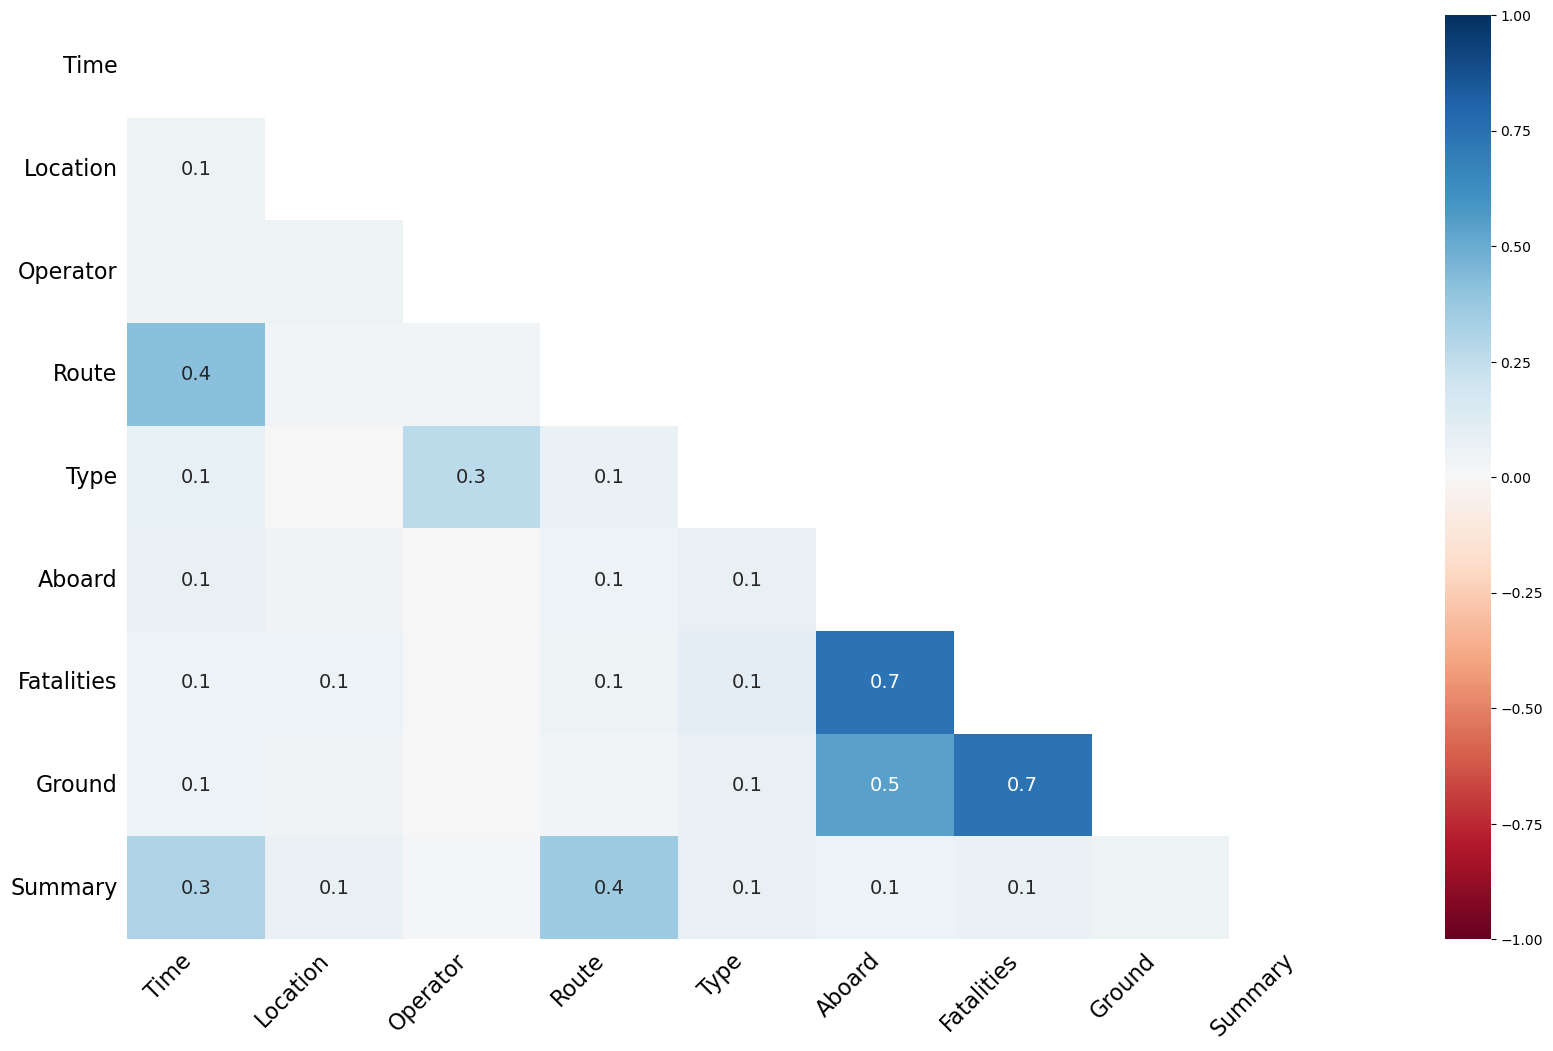

In [37]:
# матрица корреляции пропущенных значений
msno.heatmap(dataset);

In [38]:
# удаляем строки с пропусками в данных колонках
dataset.dropna(subset=['Location', 'Type', 'Operator'], axis=0, inplace=True)

In [39]:
# значения, которые невозможно восстановить, но и удалять строки нельзя т.к. слишком большой %, заменяем на unknown
dataset['Time'] = dataset['Time'].fillna('unknown')
dataset['Summary'] = dataset['Summary'].fillna('unknown')
dataset['Route'] = dataset['Route'].fillna('unknown')

In [40]:
# заменяем числовые на медианы по группам
for col in ['Aboard', 'Ground', 'Fatalities']:
    dataset[col] = dataset[col].fillna(dataset.groupby('Type')[col].transform('mean'))
dataset.isna().sum() 

Date          0
Time          0
Location      0
Operator      0
Route         0
Type          0
Aboard        8
Fatalities    3
Ground        7
Summary       0
dtype: int64

In [41]:
dataset.dropna(subset=['Aboard', 'Fatalities', 'Ground'], axis=0, inplace=True)
dataset.isna().sum() 

Date          0
Time          0
Location      0
Operator      0
Route         0
Type          0
Aboard        0
Fatalities    0
Ground        0
Summary       0
dtype: int64

In [42]:
dataset.duplicated().sum()

0